### LIB (R)

In [1]:
# bibliotecas do python
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# bibliotecas do R
base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
ts_analysis = ('urca','tseries','forecast','e1071','Metrics')

from rpy2.robjects.vectors import StrVector
utils.install_packages(StrVector(ts_analysis))

In [3]:
# importando as bibliotecas do R usadas para predição
# acho que so precisa importar uma vez. (demora)

urca = importr('urca')
tseries = importr('tseries')
forecast = importr('forecast')
e1071 = importr('e1071')
metrics = importr('Metrics')

In [4]:
# %R - "linha mágica" - retorna valor como objeto python

# %%R - "célula mágica" - nao retorna valor mas consegue passar input e output  

# Arguments
# -i  -  variaveis de input
# -o  -  variaveis de output
# -h  -  altura do plot
# -w  -  largura do plot


%load_ext rpy2.ipython

### Throughput Total (PRA - Remoção de Erros de Ciclo)

In [37]:
TS = pd.read_csv('vazao/cubic esmond data pr-am 10-21-2022.csv', sep=',')

In [38]:
TS = TS.iloc[:, 1]
media = sum(TS)/len(TS)
lim_sup = 1.2*media
lim_inf = 0.8*media
for i in range(len(TS)):
    if TS[i] < lim_inf:
        TS = TS.drop(i)
        continue
    if TS[i] > lim_sup:
        TS = TS.drop(i)
        continue

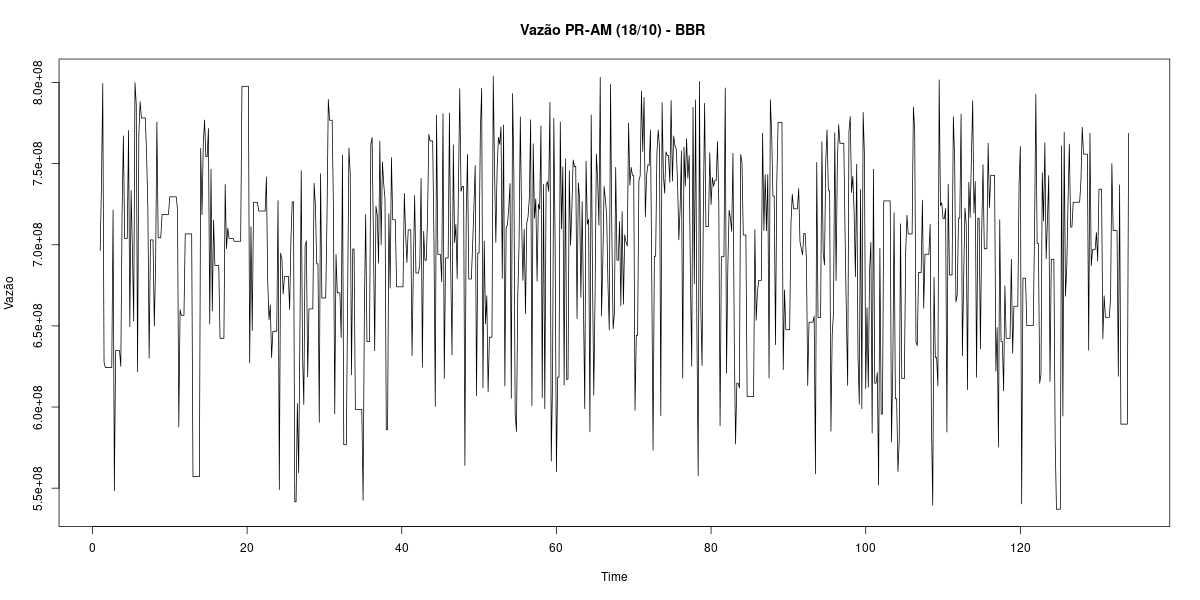

In [39]:
%%R -i TS -h 600 -w 1200

TS_R = TS

TSbbr = ts(TS_R, start = c(1, 1), frequency = 6)

plot(TSbbr, main = "Vazão PR-AM (18/10) - BBR ", ylab = "Vazão")


### Funcoes para destacar a media e variancia

In [40]:
%%R 

media = function(ts){
  #Média ao longo da série
  y = c()
  cont = 0
  for(i in 1:length(ts)){
    cont = cont + ts[i]
    y = append(y, cont/i)
  }
  med = ts(y, start = c(1, 1), frequency = 6)
  return(med)
}

variancia = function(ts){
  #variância ao longo da série
  y = c()
  for(i in 1:length(ts)){
    y = append(y, var(ts[1:i]))
  }
  var = ts(y, start = c(1, 1), frequency = 6)
  return(var)
}

### Decomposição

In [9]:
%%R -w 700 -h 400 # Decomposição da Série (Observação de tendencia e sazonaliadade)

tsadditive = decompose(TSbbr, type = "additive")
tsmult = decompose(TSbbr, type = "multiplicative")

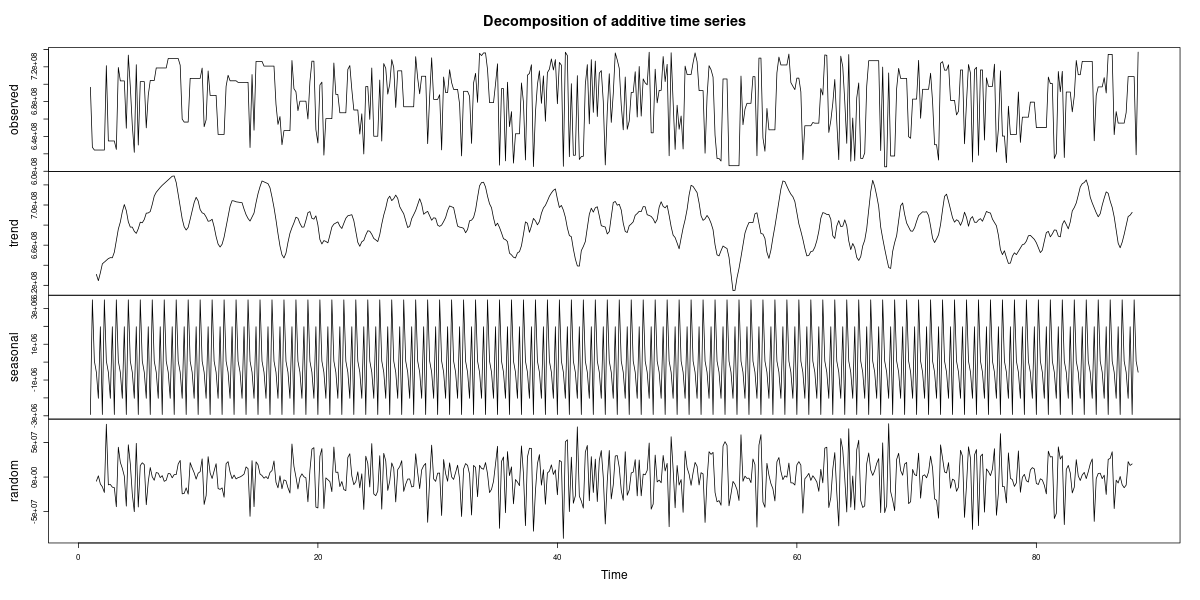

In [10]:
%%R -h 600 -w 1200

plot(tsadditive)

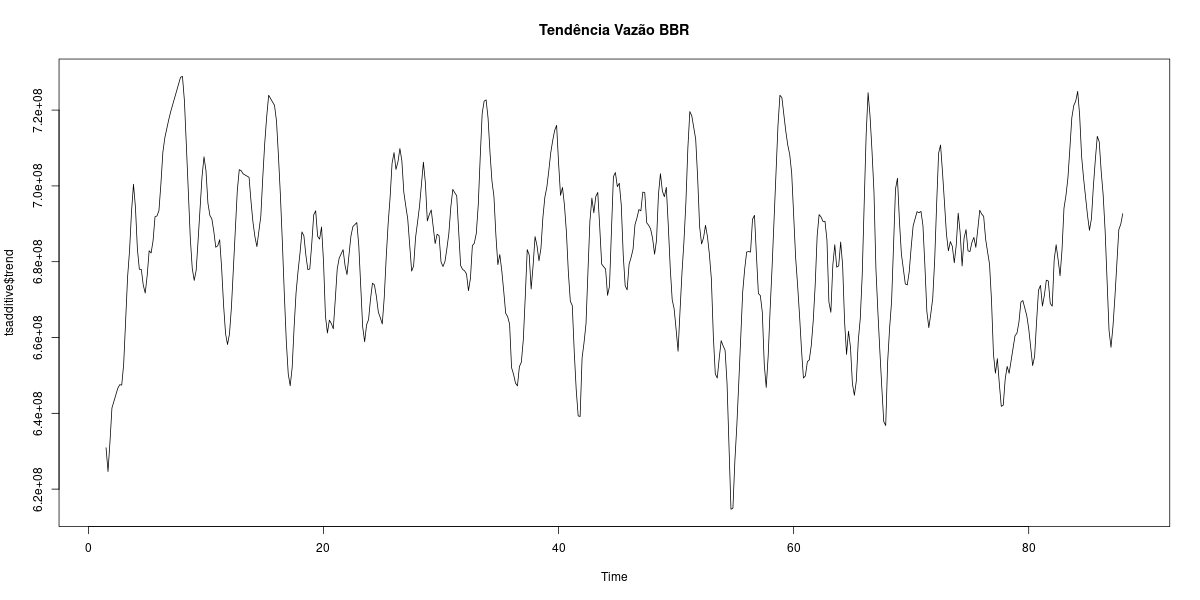

In [11]:
%%R -h 600 -w 1200 # Destacando a Tendencia

plot(tsadditive$trend, main = 'Tendência Vazão BBR')


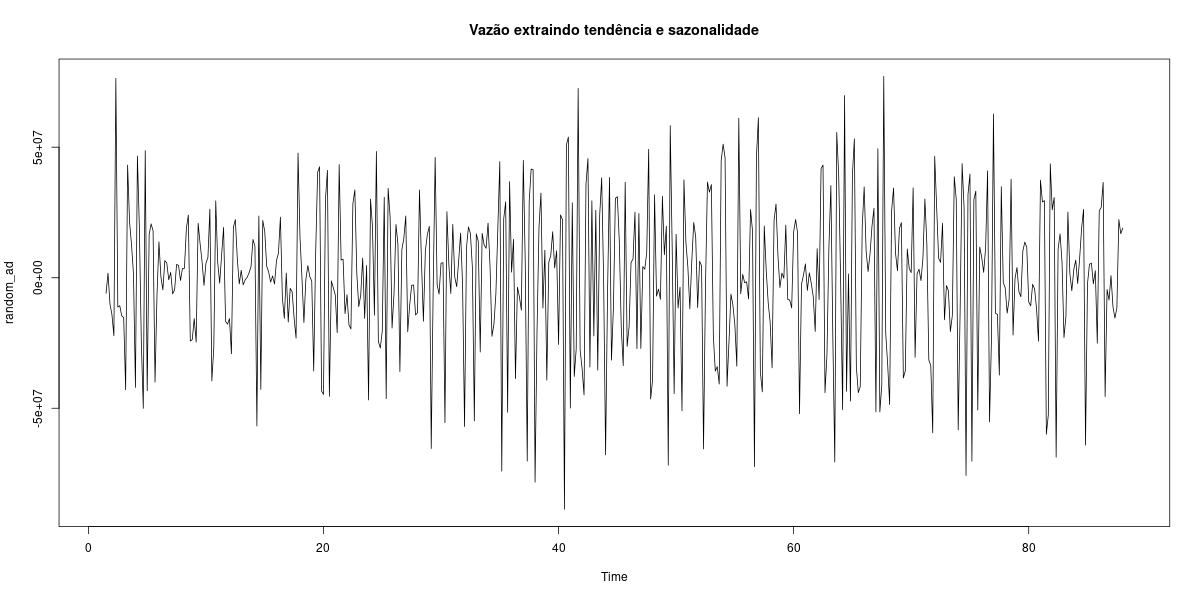

In [13]:
%%R -h 600 -w 1200 # Extraindo a Tendência e a Sazonalidade (Decomposição clássica aditiva)

random_ad = tsadditive$random

plot(random_ad, main = 'Vazão extraindo tendência e sazonalidade')

In [14]:
%%R # Excluindo valores nulos que restam da decomposição

random_ad = na.omit(random_ad)

### Vizualizaçao da media e variancia da serie original

In [15]:
%%R -h 400 -w 1200

mean = media(random_ad)
var = variancia(random_ad)

In [20]:
%%R -h 200 -w 1000

mean_or = media(TSbbr)
var_or = variancia(TSbbr)

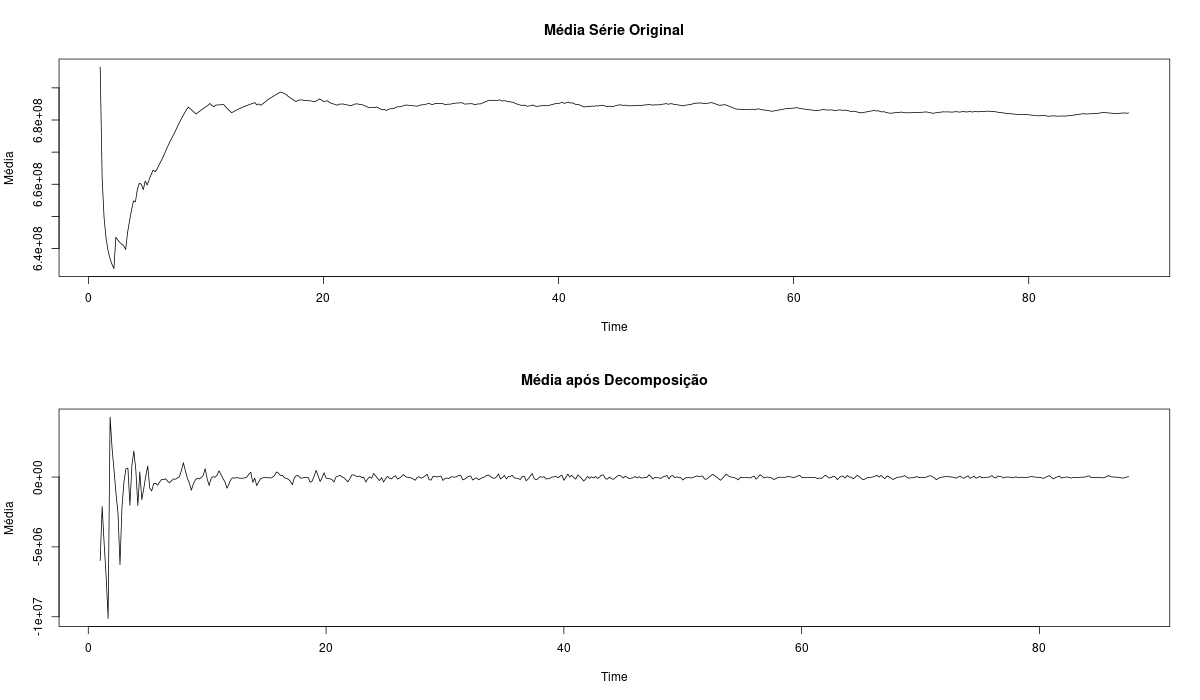

In [17]:
%%R -h 700 -w 1200

par(mfrow = c(2,1))
plot(mean_or, main = 'Média Série Original', ylab = "Média")
plot(mean, main = 'Média após Decomposição', ylab = 'Média')

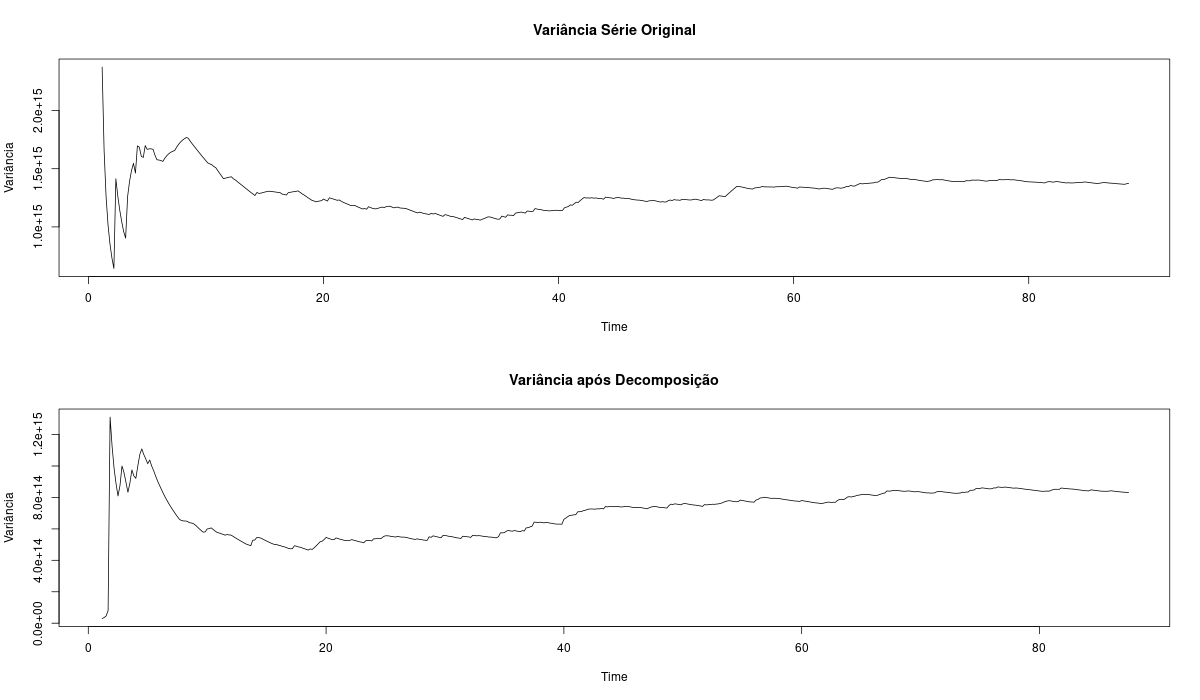

In [21]:
%%R -h 700 -w 1200

par(mfrow = c(2,1))
plot(var_or, main = 'Variância Série Original', ylab = "Variância")
plot(var, main = 'Variância após Decomposição', ylab = 'Variância')

### Teste de Estacionariedade (Serie Total - Observação)

In [22]:
%%R -h 400 -w 1000 # Teste de estacionariedade para cada tipo de decomposição

kpss_add = ur.kpss(random_ad)
#kpss_mul = ur.kpss(random_mt)

adf_add = ur.df(random_ad)
#adf_mul = ur.df(random_mt)

In [23]:
%%R

print(kpss_add)
#print(kpss_mul)

print(adf_add)
#print(adf_mul)


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.0088 


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -25.9124 



### Separar Conjuntos

In [41]:
%%R # Separar conjuntos de treino

conjunto_treino = c("mytsTrain3", 
                    "mytsTrain6",
                    "mytsTrain9", 
                    "mytsTrain12",
                    "mytsTrain15",
                    "mytsTrain18",
                    "mytsTrain21",
                    "mytsTrain24",
                    "mytsTrain27",
                    "mytsTrain30",
                    "mytsTrain33",
                    "mytsTrain36",
                    "mytsTrain39",
                    "mytsTrain42",
                    "mytsTrain45",
                    "mytsTrain48",
                    "mytsTrain51",
                    "mytsTrain54",
                    "mytsTrain57",
                    "mytsTrain60",
                    "mytsTrain63",
                    "mytsTrain66",
                    "mytsTrain69",
                    "mytsTrain72",
                    "mytsTrain75",
                    "mytsTrain78",
                    "mytsTrain81",
                    "mytsTrain84",
                    "mytsTrain87",
                    "mytsTrain90",
                    "mytsTrain93",
                    "mytsTrain96",
                    "mytsTrain99",
                    "mytsTrain102",
                    "mytsTrain105",
                    "mytsTrain108",
                    "mytsTrain111",
                    "mytsTrain114",
                    "mytsTrain117",
                    "mytsTrain120",
                    "mytsTrain123",
                    "mytsTrain126",
                    "mytsTrain129",
                    "mytsTrain132",
                    "mytsTrain135",
                    "mytsTrain138")
                    # "mytsTrain141",
                    # "mytsTrain144")


In [42]:
%%R

mytsTrain3 = window(TSbbr, start = c(1,1), end = c(3,6))
mytsTrain6 = window(TSbbr, start = c(1,1), end = c(6,6))
mytsTrain9 = window(TSbbr, start = c(1,1), end = c(9,6))
mytsTrain12 = window(TSbbr, start = c(1,1), end = c(12,6))
mytsTrain15 = window(TSbbr, start = c(1,1), end = c(15,6))
mytsTrain18 = window(TSbbr, start = c(1,1), end = c(18,6))
mytsTrain21 = window(TSbbr, start = c(1,1), end = c(21,6))
mytsTrain24 = window(TSbbr, start = c(1,1), end = c(24,6))
mytsTrain27 = window(TSbbr, start = c(1,1), end = c(27,6))
mytsTrain30 = window(TSbbr, start = c(1,1), end = c(30,6))
mytsTrain33 = window(TSbbr, start = c(1,1), end = c(33,6))
mytsTrain36 = window(TSbbr, start = c(1,1), end = c(36,6))
mytsTrain39 = window(TSbbr, start = c(1,1), end = c(39,6))
mytsTrain42 = window(TSbbr, start = c(1,1), end = c(42,6))
mytsTrain45 = window(TSbbr, start = c(1,1), end = c(45,6))
mytsTrain48 = window(TSbbr, start = c(1,1), end = c(48,6))
mytsTrain51 = window(TSbbr, start = c(1,1), end = c(51,6))
mytsTrain54 = window(TSbbr, start = c(1,1), end = c(54,6))
mytsTrain57 = window(TSbbr, start = c(1,1), end = c(57,6))
mytsTrain60 = window(TSbbr, start = c(1,1), end = c(60,6))
mytsTrain63 = window(TSbbr, start = c(1,1), end = c(63,6))
mytsTrain66 = window(TSbbr, start = c(1,1), end = c(66,6))
mytsTrain69 = window(TSbbr, start = c(1,1), end = c(69,6))
mytsTrain72 = window(TSbbr, start = c(1,1), end = c(72,6))
mytsTrain75 = window(TSbbr, start = c(1,1), end = c(75,6))
mytsTrain78 = window(TSbbr, start = c(1,1), end = c(78,6))
mytsTrain81 = window(TSbbr, start = c(1,1), end = c(81,6))
mytsTrain84 = window(TSbbr, start = c(1,1), end = c(84,6))
mytsTrain87 = window(TSbbr, start = c(1,1), end = c(87,6))
mytsTrain90 = window(TSbbr, start = c(1,1), end = c(90,6))
mytsTrain93 = window(TSbbr, start = c(1,1), end = c(93,6))
mytsTrain96 = window(TSbbr, start = c(1,1), end = c(96,6))
mytsTrain99 = window(TSbbr, start = c(1,1), end = c(99,6))
mytsTrain102 = window(TSbbr, start = c(1,1), end = c(102,6))
mytsTrain105 = window(TSbbr, start = c(1,1), end = c(105,6))
mytsTrain108 = window(TSbbr, start = c(1,1), end = c(108,6))
mytsTrain111 = window(TSbbr, start = c(1,1), end = c(111,6))
mytsTrain114 = window(TSbbr, start = c(1,1), end = c(114,6))
mytsTrain117 = window(TSbbr, start = c(1,1), end = c(117,6))
mytsTrain120 = window(TSbbr, start = c(1,1), end = c(120,6))
mytsTrain123 = window(TSbbr, start = c(1,1), end = c(123,6))
mytsTrain126 = window(TSbbr, start = c(1,1), end = c(126,6))
mytsTrain129 = window(TSbbr, start = c(1,1), end = c(129,6))
mytsTrain132 = window(TSbbr, start = c(1,1), end = c(132,6))
mytsTrain135 = window(TSbbr, start = c(1,1), end = c(135,6))
mytsTrain138 = window(TSbbr, start = c(1,1), end = c(138,6))
# mytsTrain141 = window(TSbbr, start = c(1,1), end = c(141,6))
# #mytsTrain144 = window(TSbbr, start = c(1,1), end = c(144,6))


In [44]:
%%R 

mytsTest4 = window(TSbbr, start = c(4,1), end = c(4,6))
mytsTest7 = window(TSbbr, start = c(7,1), end = c(7,6))
mytsTest10 = window(TSbbr, start = c(10,1), end = c(10,6)) 
mytsTest13 = window(TSbbr, start = c(13,1), end = c(13,6)) 
mytsTest16 = window(TSbbr, start = c(16,1), end = c(16,6)) 
mytsTest19 = window(TSbbr, start = c(19,1), end = c(19,6)) 
mytsTest22 = window(TSbbr, start = c(22,1), end = c(22,6)) 
mytsTest25 = window(TSbbr, start = c(25,1), end = c(25,6))
mytsTest28 = window(TSbbr, start = c(28,1), end = c(28,6)) 
mytsTest31 = window(TSbbr, start = c(31,1), end = c(31,6)) 
mytsTest34 = window(TSbbr, start = c(34,1), end = c(34,6)) 
mytsTest37 = window(TSbbr, start = c(37,1), end = c(37,6))
mytsTest40 = window(TSbbr, start = c(40,1), end = c(40,6)) 
mytsTest43 = window(TSbbr, start = c(43,1), end = c(43,6)) 
mytsTest46 = window(TSbbr, start = c(46,1), end = c(46,6)) 
mytsTest49 = window(TSbbr, start = c(49,1), end = c(49,6))
mytsTest52 = window(TSbbr, start = c(52,1), end = c(52,6)) 
mytsTest55 = window(TSbbr, start = c(55,1), end = c(55,6)) 
mytsTest58 = window(TSbbr, start = c(58,1), end = c(58,6)) 
mytsTest61 = window(TSbbr, start = c(61,1), end = c(61,6))
mytsTest64 = window(TSbbr, start = c(64,1), end = c(64,6))
mytsTest67 = window(TSbbr, start = c(67,1), end = c(67,6))
mytsTest70 = window(TSbbr, start = c(70,1), end = c(70,6))
mytsTest73 = window(TSbbr, start = c(73,1), end = c(73,6))
mytsTest76 = window(TSbbr, start = c(76,1), end = c(76,6))
mytsTest79 = window(TSbbr, start = c(79,1), end = c(79,6))
mytsTest82 = window(TSbbr, start = c(82,1), end = c(82,6))
mytsTest85 = window(TSbbr, start = c(85,1), end = c(85,6))
mytsTest88 = window(TSbbr, start = c(88,1), end = c(88,6))
mytsTest91 = window(TSbbr, start = c(91,1), end = c(91,6))
mytsTest94 = window(TSbbr, start = c(94,1), end = c(94,6))
mytsTest97 = window(TSbbr, start = c(97,1), end = c(97,6))
mytsTest100 = window(TSbbr, start = c(100,1), end = c(100,6))
mytsTest103 = window(TSbbr, start = c(103,1), end = c(103,6))
mytsTest106 = window(TSbbr, start = c(106,1), end = c(106,6))
mytsTest109 = window(TSbbr, start = c(109,1), end = c(109,6))
mytsTest112 = window(TSbbr, start = c(112,1), end = c(112,6))
mytsTest115 = window(TSbbr, start = c(115,1), end = c(115,6))
mytsTest118 = window(TSbbr, start = c(118,1), end = c(118,6))
mytsTest121 = window(TSbbr, start = c(121,1), end = c(121,6))
mytsTest124 = window(TSbbr, start = c(124,1), end = c(124,6))
mytsTest127 = window(TSbbr, start = c(127,1), end = c(127,6))
mytsTest130 = window(TSbbr, start = c(130,1), end = c(130,6))
mytsTest133 = window(TSbbr, start = c(133,1), end = c(133,6))
mytsTest136 = window(TSbbr, start = c(136,1), end = c(136,6))
mytsTest139 = window(TSbbr, start = c(139,1), end = c(139,6))
# mytsTest142 = window(TSbbr, start = c(142,1), end = c(142,6))
# #mytsTest145 = window(TSbbr, start = c(145,1), end = c(145,6))


R[write to console]: Error in window.default(x, ...) : 'start' cannot be after 'end'

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In window.default(x, ...) :
R[write to console]:  'end' value not changed




Error in window.default(x, ...) : 'start' cannot be after 'end'


RInterpreterError: Failed to parse and evaluate line '\nmytsTest4 = window(TSbbr, start = c(4,1), end = c(4,6))\nmytsTest7 = window(TSbbr, start = c(7,1), end = c(7,6))\nmytsTest10 = window(TSbbr, start = c(10,1), end = c(10,6)) \nmytsTest13 = window(TSbbr, start = c(13,1), end = c(13,6)) \nmytsTest16 = window(TSbbr, start = c(16,1), end = c(16,6)) \nmytsTest19 = window(TSbbr, start = c(19,1), end = c(19,6)) \nmytsTest22 = window(TSbbr, start = c(22,1), end = c(22,6)) \nmytsTest25 = window(TSbbr, start = c(25,1), end = c(25,6))\nmytsTest28 = window(TSbbr, start = c(28,1), end = c(28,6)) \nmytsTest31 = window(TSbbr, start = c(31,1), end = c(31,6)) \nmytsTest34 = window(TSbbr, start = c(34,1), end = c(34,6)) \nmytsTest37 = window(TSbbr, start = c(37,1), end = c(37,6))\nmytsTest40 = window(TSbbr, start = c(40,1), end = c(40,6)) \nmytsTest43 = window(TSbbr, start = c(43,1), end = c(43,6)) \nmytsTest46 = window(TSbbr, start = c(46,1), end = c(46,6)) \nmytsTest49 = window(TSbbr, start = c(49,1), end = c(49,6))\nmytsTest52 = window(TSbbr, start = c(52,1), end = c(52,6)) \nmytsTest55 = window(TSbbr, start = c(55,1), end = c(55,6)) \nmytsTest58 = window(TSbbr, start = c(58,1), end = c(58,6)) \nmytsTest61 = window(TSbbr, start = c(61,1), end = c(61,6))\nmytsTest64 = window(TSbbr, start = c(64,1), end = c(64,6))\nmytsTest67 = window(TSbbr, start = c(67,1), end = c(67,6))\nmytsTest70 = window(TSbbr, start = c(70,1), end = c(70,6))\nmytsTest73 = window(TSbbr, start = c(73,1), end = c(73,6))\nmytsTest76 = window(TSbbr, start = c(76,1), end = c(76,6))\nmytsTest79 = window(TSbbr, start = c(79,1), end = c(79,6))\nmytsTest82 = window(TSbbr, start = c(82,1), end = c(82,6))\nmytsTest85 = window(TSbbr, start = c(85,1), end = c(85,6))\nmytsTest88 = window(TSbbr, start = c(88,1), end = c(88,6))\nmytsTest91 = window(TSbbr, start = c(91,1), end = c(91,6))\nmytsTest94 = window(TSbbr, start = c(94,1), end = c(94,6))\nmytsTest97 = window(TSbbr, start = c(97,1), end = c(97,6))\nmytsTest100 = window(TSbbr, start = c(100,1), end = c(100,6))\nmytsTest103 = window(TSbbr, start = c(103,1), end = c(103,6))\nmytsTest106 = window(TSbbr, start = c(106,1), end = c(106,6))\nmytsTest109 = window(TSbbr, start = c(109,1), end = c(109,6))\nmytsTest112 = window(TSbbr, start = c(112,1), end = c(112,6))\nmytsTest115 = window(TSbbr, start = c(115,1), end = c(115,6))\nmytsTest118 = window(TSbbr, start = c(118,1), end = c(118,6))\nmytsTest121 = window(TSbbr, start = c(121,1), end = c(121,6))\nmytsTest124 = window(TSbbr, start = c(124,1), end = c(124,6))\nmytsTest127 = window(TSbbr, start = c(127,1), end = c(127,6))\nmytsTest130 = window(TSbbr, start = c(130,1), end = c(130,6))\nmytsTest133 = window(TSbbr, start = c(133,1), end = c(133,6))\nmytsTest136 = window(TSbbr, start = c(136,1), end = c(136,6))\n#mytsTest139 = window(TSbbr, start = c(139,1), end = c(139,6))\n# mytsTest142 = window(TSbbr, start = c(142,1), end = c(142,6))\n# #mytsTest145 = window(TSbbr, start = c(145,1), end = c(145,6))\n'.
R error message: "Error in window.default(x, ...) : 'start' cannot be after 'end'"

### FAC

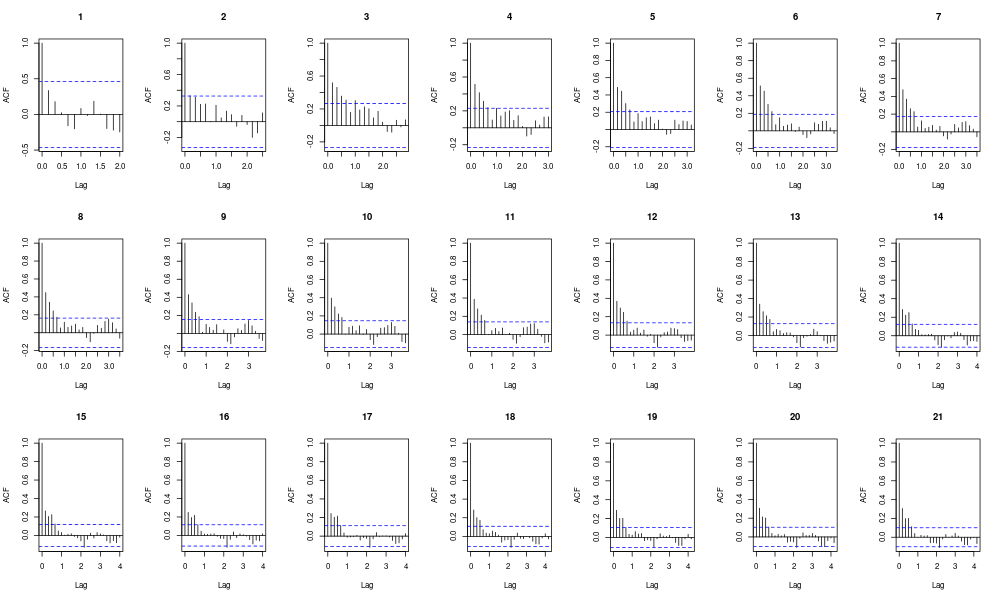

In [30]:
%%R -w 1000 -h 600

par(mfrow = c(3,7))
acf(mytsTrain3, main = "1")
acf(mytsTrain6, main = "2")
acf(mytsTrain9, main = "3")
acf(mytsTrain12, main = "4")
acf(mytsTrain15, main = "5")
acf(mytsTrain18, main = "6")
acf(mytsTrain21, main = "7")
acf(mytsTrain24, main = "8")
acf(mytsTrain27, main = "9")
acf(mytsTrain30, main = "10")
acf(mytsTrain33, main = "11")
acf(mytsTrain36, main = "12")
acf(mytsTrain39, main = "13")
acf(mytsTrain42, main = "14")
acf(mytsTrain45, main = "15")
acf(mytsTrain48, main = "16")
acf(mytsTrain51, main = "17")
acf(mytsTrain54, main = "18")
acf(mytsTrain57, main = "19")
acf(mytsTrain60, main = "20")
acf(mytsTrain63, main = "21")

### Teste de Estacionariedade para todos os conjuntos

In [31]:
%%R # Testes de Estacionariedade (PRA)

adf_test = c(
  adf.test(mytsTrain3)$statistic, #3
  adf.test(mytsTrain6)$statistic,
  adf.test(mytsTrain9)$statistic,
  adf.test(mytsTrain12)$statistic, #30
  adf.test(mytsTrain15)$statistic,
  adf.test(mytsTrain18)$statistic,
  adf.test(mytsTrain21)$statistic,
  adf.test(mytsTrain24)$statistic,
  adf.test(mytsTrain27)$statistic,
  adf.test(mytsTrain30)$statistic,
  adf.test(mytsTrain33)$statistic,
  adf.test(mytsTrain36)$statistic,
  adf.test(mytsTrain39)$statistic,
  adf.test(mytsTrain42)$statistic,
  adf.test(mytsTrain45)$statistic,
  adf.test(mytsTrain48)$statistic,
  adf.test(mytsTrain51)$statistic,
  adf.test(mytsTrain54)$statistic,
  adf.test(mytsTrain57)$statistic,
  adf.test(mytsTrain60)$statistic,
  adf.test(mytsTrain63)$statistic,
  adf.test(mytsTrain66)$statistic,
  adf.test(mytsTrain69)$statistic,
  adf.test(mytsTrain72)$statistic,
  adf.test(mytsTrain75)$statistic,
  adf.test(mytsTrain78)$statistic,
  adf.test(mytsTrain81)$statistic,
  adf.test(mytsTrain84)$statistic)
  # adf.test(mytsTrain87)$statistic,
  # adf.test(mytsTrain90)$statistic,
  # adf.test(mytsTrain93)$statistic,
  # adf.test(mytsTrain96)$statistic,
  # adf.test(mytsTrain99)$statistic,
  # adf.test(mytsTrain102)$statistic,
  # adf.test(mytsTrain105)$statistic,
  # adf.test(mytsTrain108)$statistic,
  # adf.test(mytsTrain111)$statistic,
  # adf.test(mytsTrain114)$statistic,
  # adf.test(mytsTrain117)$statistic,
  # adf.test(mytsTrain120)$statistic,
  # adf.test(mytsTrain123)$statistic,
  # adf.test(mytsTrain126)$statistic,
  # adf.test(mytsTrain129)$statistic,
  # adf.test(mytsTrain132)$statistic,
  # adf.test(mytsTrain135)$statistic,
  # adf.test(mytsTrain138)$statistic,
  # adf.test(mytsTrain141)$statistic,
  # adf.test(mytsTrain144)$statistic)

In [32]:
%%R 
  adf_test_pv = conjnuto_treino = c(
  adf.test(mytsTrain3)$p.value, #3
  adf.test(mytsTrain6)$p.value,
  adf.test(mytsTrain9)$p.value,
  adf.test(mytsTrain12)$p.value, #30
  adf.test(mytsTrain15)$p.value,
  adf.test(mytsTrain18)$p.value,
  adf.test(mytsTrain21)$p.value,
  adf.test(mytsTrain24)$p.value,
  adf.test(mytsTrain27)$p.value,
  adf.test(mytsTrain30)$p.value,
  adf.test(mytsTrain33)$p.value,
  adf.test(mytsTrain36)$p.value,
  adf.test(mytsTrain39)$p.value,
  adf.test(mytsTrain42)$p.value,
  adf.test(mytsTrain45)$p.value,
  adf.test(mytsTrain48)$p.value,
  adf.test(mytsTrain51)$p.value,
  adf.test(mytsTrain54)$p.value,
  adf.test(mytsTrain57)$p.value,
  adf.test(mytsTrain60)$p.value,
  adf.test(mytsTrain63)$p.value,
  adf.test(mytsTrain66)$p.value,
  adf.test(mytsTrain69)$p.value,
  adf.test(mytsTrain72)$p.value,
  adf.test(mytsTrain75)$p.value,
  adf.test(mytsTrain78)$p.value,
  adf.test(mytsTrain81)$p.value,
  adf.test(mytsTrain84)$p.value)
  # adf.test(mytsTrain87)$p.value,
  # adf.test(mytsTrain90)$p.value,
  # adf.test(mytsTrain93)$p.value,
  # adf.test(mytsTrain96)$p.value,
  # adf.test(mytsTrain99)$p.value, 
  # adf.test(mytsTrain102)$p.value,
  # adf.test(mytsTrain105)$p.value,
  # adf.test(mytsTrain108)$p.value,
  # adf.test(mytsTrain111)$p.value,
  # adf.test(mytsTrain114)$p.value,
  # adf.test(mytsTrain117)$p.value,
  # adf.test(mytsTrain120)$p.value,
  # adf.test(mytsTrain123)$p.value,
  # adf.test(mytsTrain126)$p.value,
  # adf.test(mytsTrain129)$p.value,
  # adf.test(mytsTrain132)$p.value,
  # adf.test(mytsTrain135)$p.value,
  # adf.test(mytsTrain138)$p.value,
  # adf.test(mytsTrain141)$p.value,
  # adf.test(mytsTrain144)$p.value)

In [33]:
%%R
  kpss_test = c(
  kpss.test(mytsTrain3)$statistic,
  kpss.test(mytsTrain6)$statistic,
  kpss.test(mytsTrain9)$statistic,
  kpss.test(mytsTrain12)$statistic,
  kpss.test(mytsTrain15)$statistic,
  kpss.test(mytsTrain18)$statistic,
  kpss.test(mytsTrain21)$statistic,
  kpss.test(mytsTrain24)$statistic,
  kpss.test(mytsTrain27)$statistic,
  kpss.test(mytsTrain30)$statistic,
  kpss.test(mytsTrain33)$statistic,
  kpss.test(mytsTrain36)$statistic,
  kpss.test(mytsTrain39)$statistic,
  kpss.test(mytsTrain42)$statistic,
  kpss.test(mytsTrain45)$statistic,
  kpss.test(mytsTrain48)$statistic,
  kpss.test(mytsTrain51)$statistic,
  kpss.test(mytsTrain54)$statistic,
  kpss.test(mytsTrain57)$statistic,
  kpss.test(mytsTrain60)$statistic,
  kpss.test(mytsTrain63)$statistic,
  kpss.test(mytsTrain66)$statistic,
  kpss.test(mytsTrain69)$statistic,
  kpss.test(mytsTrain72)$statistic,
  kpss.test(mytsTrain75)$statistic,
  kpss.test(mytsTrain78)$statistic,
  kpss.test(mytsTrain81)$statistic,
  kpss.test(mytsTrain84)$statistic)
  # kpss.test(mytsTrain87)$statistic,
  # kpss.test(mytsTrain90)$statistic,
  # kpss.test(mytsTrain93)$statistic,
  # kpss.test(mytsTrain96)$statistic,
  # kpss.test(mytsTrain99)$statistic,
  # kpss.test(mytsTrain102)$statistic,
  # kpss.test(mytsTrain105)$statistic,
  # kpss.test(mytsTrain108)$statistic,
  # kpss.test(mytsTrain111)$statistic,
  # kpss.test(mytsTrain114)$statistic,
  # kpss.test(mytsTrain117)$statistic,
  # kpss.test(mytsTrain120)$statistic,
  # kpss.test(mytsTrain123)$statistic,
  # kpss.test(mytsTrain126)$statistic,
  # kpss.test(mytsTrain129)$statistic,
  # kpss.test(mytsTrain132)$statistic,
  # kpss.test(mytsTrain135)$statistic,
  # kpss.test(mytsTrain138)$statistic,
  # kpss.test(mytsTrain141)$statistic,
  # kpss.test(mytsTrain144)$statistic)

In [34]:
%%R
  kpss_test_pv = kpss_test = c(
  kpss.test(mytsTrain3)$p.value,
  kpss.test(mytsTrain6)$p.value,
  kpss.test(mytsTrain9)$p.value,
  kpss.test(mytsTrain12)$p.value,
  kpss.test(mytsTrain15)$p.value,
  kpss.test(mytsTrain18)$p.value,
  kpss.test(mytsTrain21)$p.value,
  kpss.test(mytsTrain24)$p.value,
  kpss.test(mytsTrain27)$p.value,
  kpss.test(mytsTrain30)$p.value,
  kpss.test(mytsTrain33)$p.value,
  kpss.test(mytsTrain36)$p.value,
  kpss.test(mytsTrain39)$p.value,
  kpss.test(mytsTrain42)$p.value,
  kpss.test(mytsTrain45)$p.value,
  kpss.test(mytsTrain48)$p.value,
  kpss.test(mytsTrain51)$p.value,
  kpss.test(mytsTrain54)$p.value,
  kpss.test(mytsTrain57)$p.value,
  kpss.test(mytsTrain60)$p.value,
  kpss.test(mytsTrain63)$p.value,
  kpss.test(mytsTrain66)$p.value,
  kpss.test(mytsTrain69)$p.value,
  kpss.test(mytsTrain72)$p.value,
  kpss.test(mytsTrain75)$p.value,
  kpss.test(mytsTrain78)$p.value,
  kpss.test(mytsTrain81)$p.value,
  kpss.test(mytsTrain84)$p.value)
  # kpss.test(mytsTrain87)$p.value,
  # kpss.test(mytsTrain90)$p.value,
  # kpss.test(mytsTrain93)$p.value,
  # kpss.test(mytsTrain96)$p.value,
  # kpss.test(mytsTrain99)$p.value,
  # kpss.test(mytsTrain102)$p.value,
  # kpss.test(mytsTrain105)$p.value,
  # kpss.test(mytsTrain108)$p.value,
  # kpss.test(mytsTrain111)$p.value,
  # kpss.test(mytsTrain114)$p.value,
  # kpss.test(mytsTrain117)$p.value,
  # kpss.test(mytsTrain120)$p.value,
  # kpss.test(mytsTrain123)$p.value,
  # kpss.test(mytsTrain126)$p.value,
  # kpss.test(mytsTrain129)$p.value,
  # kpss.test(mytsTrain132)$p.value,
  # kpss.test(mytsTrain135)$p.value,
  # kpss.test(mytsTrain138)$p.value,
  # kpss.test(mytsTrain141)$p.value,
  # kpss.test(mytsTrain144)$p.value)

In [35]:
%%R

print(length(conjunto_treino))
print(length(adf_test))
print(length(adf_test_pv))
print(length(kpss_test))
print(length(kpss_test_pv))

[1] 28
[1] 28
[1] 28
[1] 28
[1] 28


In [552]:
%%R

testes_estac = data.frame(conjuntos_de_treino = conjunto_treino,
                          ADF_Test = adf_test, ADF_Pvalue = adf_test_pv,
                          KPSS_Test = kpss_test, KPSS_Pvalue = kpss_test_pv)

testes_estac

   conjuntos_de_treino  ADF_Test ADF_Pvalue  KPSS_Test KPSS_Pvalue
1           mytsTrain3 -2.065404 0.54746516 0.10000000  0.10000000
2           mytsTrain6 -3.234335 0.09733502 0.10000000  0.10000000
3           mytsTrain9 -3.576928 0.04331258 0.10000000  0.10000000
4          mytsTrain12 -3.762588 0.02568691 0.10000000  0.10000000
5          mytsTrain15 -4.664816 0.01000000 0.10000000  0.10000000
6          mytsTrain18 -5.183783 0.01000000 0.10000000  0.10000000
7          mytsTrain21 -5.676702 0.01000000 0.10000000  0.10000000
8          mytsTrain24 -5.284861 0.01000000 0.10000000  0.10000000
9          mytsTrain27 -5.636265 0.01000000 0.10000000  0.10000000
10         mytsTrain30 -5.875969 0.01000000 0.10000000  0.10000000
11         mytsTrain33 -6.069673 0.01000000 0.10000000  0.10000000
12         mytsTrain36 -6.083019 0.01000000 0.10000000  0.10000000
13         mytsTrain39 -5.976031 0.01000000 0.10000000  0.10000000
14         mytsTrain42 -6.199091 0.01000000 0.10000000  0.1000

### Aplicação dos modelos de predição

### Treinamento - (ARIMA, Rede Neural, Holt-Winters)

In [401]:
%%R # Treinamento ARIMA

mytsArima3 = auto.arima(mytsTrain3, lambda = 1, d=2)
mytsArima6 = auto.arima(mytsTrain6, lambda = 1, d=2)
mytsArima9 = auto.arima(mytsTrain9, lambda = 1, d=2)
mytsArima12 = auto.arima(mytsTrain12, lambda = 1, d=2)
mytsArima15 = auto.arima(mytsTrain15, lambda = 1, d=2)
mytsArima18 = auto.arima(mytsTrain18, lambda = 1, d=2)
mytsArima21 = auto.arima(mytsTrain21, lambda = 1, d=2)
mytsArima24 = auto.arima(mytsTrain24, lambda = 1, d=2)
mytsArima27 = auto.arima(mytsTrain27, lambda = 1, d=2)
mytsArima30 = auto.arima(mytsTrain30, lambda = 1, d=2)
mytsArima33 = auto.arima(mytsTrain33, lambda = 1, d=2)
mytsArima36 = auto.arima(mytsTrain36, lambda = 1, d=2)
mytsArima39 = auto.arima(mytsTrain39, lambda = 1, d=2)
mytsArima42 = auto.arima(mytsTrain42, lambda = 1, d=2)



In [ ]:
mytsArima45 = auto.arima(mytsTrain45,lambda = 0)
mytsArima48 = auto.arima(mytsTrain48,lambda = 0)
mytsArima51 = auto.arima(mytsTrain51,lambda = 0)
mytsArima54 = auto.arima(mytsTrain54,lambda = 0)
mytsArima57 = auto.arima(mytsTrain57,lambda = 0)
mytsArima60 = auto.arima(mytsTrain60,lambda = 0)
mytsArima63 = auto.arima(mytsTrain63,lambda = 0)
mytsArima66 = auto.arima(mytsTrain66,lambda = 0)
mytsArima69 = auto.arima(mytsTrain69,lambda = 0)
mytsArima72 = auto.arima(mytsTrain72,lambda = 0)
mytsArima75 = auto.arima(mytsTrain75,lambda = 0)
mytsArima78 = auto.arima(mytsTrain78,lambda = 0)
mytsArima81 = auto.arima(mytsTrain81,lambda = 0)
mytsArima84 = auto.arima(mytsTrain84,lambda = 0)
mytsArima87 = auto.arima(mytsTrain87,lambda = 0)
mytsArima90 = auto.arima(mytsTrain90,lambda = 0)
mytsArima93 = auto.arima(mytsTrain93,lambda = 0)
mytsArima96 = auto.arima(mytsTrain96,lambda = 0)
mytsArima99 = auto.arima(mytsTrain99,lambda = 0)
mytsArima102 = auto.arima(mytsTrain102,lambda = 0)
mytsArima105 = auto.arima(mytsTrain105,lambda = 0)
mytsArima108 = auto.arima(mytsTrain108,lambda = 0)
mytsArima111 = auto.arima(mytsTrain111,lambda = 0)
mytsArima114 = auto.arima(mytsTrain114,lambda = 0)
mytsArima117 = auto.arima(mytsTrain117,lambda = 0)
mytsArima120 = auto.arima(mytsTrain120,lambda = 0)
mytsArima123 = auto.arima(mytsTrain123,lambda = 0)
mytsArima126 = auto.arima(mytsTrain126,lambda = 0)
mytsArima129 = auto.arima(mytsTrain129,lambda = 0)
mytsArima132 = auto.arima(mytsTrain132,lambda = 0)
mytsArima135 = auto.arima(mytsTrain135,lambda = 0)
mytsArima138 = auto.arima(mytsTrain138,lambda = 0)
mytsArima141 = auto.arima(mytsTrain141,lambda = 0)
mytsArima144 = auto.arima(mytsTrain144,lambda = 0)
#mytsArima147 = auto.arima(mytsTrain146,lambda = 0)
#mytsArima149 = auto.arima(mytsTrain149,lambda = 0)

In [402]:
%%R # Treinamento Neural

mytsNeural3 = nnetar(mytsTrain3, lambda = 1, d = 2)
mytsNeural6 = nnetar(mytsTrain6, lambda = 1, d = 2)
mytsNeural9 = nnetar(mytsTrain9, lambda = 1, d = 2)
mytsNeural12 = nnetar(mytsTrain12, lambda = 1, d = 2)
mytsNeural15 = nnetar(mytsTrain15, lambda = 1, d = 2)
mytsNeural18 = nnetar(mytsTrain18, lambda = 1, d = 2)
mytsNeural21 = nnetar(mytsTrain21, lambda = 1, d = 2)
mytsNeural24 = nnetar(mytsTrain24, lambda = 1, d = 2)
mytsNeural27 = nnetar(mytsTrain27, lambda = 1, d = 2)
mytsNeural30 = nnetar(mytsTrain30, lambda = 1, d = 2)
mytsNeural33 = nnetar(mytsTrain33, lambda = 1, d = 2)
mytsNeural36 = nnetar(mytsTrain36, lambda = 1, d = 2)
mytsNeural39 = nnetar(mytsTrain39, lambda = 1, d = 2)
mytsNeural42 = nnetar(mytsTrain42, lambda = 1, d = 2)


In [ ]:
mytsNeural45 = nnetar(mytsTrain45)
mytsNeural48 = nnetar(mytsTrain48)
mytsNeural51 = nnetar(mytsTrain51)
mytsNeural54 = nnetar(mytsTrain54)
mytsNeural57 = nnetar(mytsTrain57)
mytsNeural60 = nnetar(mytsTrain60)
mytsNeural63 = nnetar(mytsTrain63)
mytsNeural66 = nnetar(mytsTrain66)
mytsNeural69 = nnetar(mytsTrain69)
mytsNeural72 = nnetar(mytsTrain72)
mytsNeural75 = nnetar(mytsTrain75)
mytsNeural78 = nnetar(mytsTrain78)
mytsNeural81 = nnetar(mytsTrain81)
mytsNeural84 = nnetar(mytsTrain84)
mytsNeural87 = nnetar(mytsTrain87)
mytsNeural90 = nnetar(mytsTrain90)
mytsNeural93 = nnetar(mytsTrain93)
mytsNeural96 = nnetar(mytsTrain96)
mytsNeural99 = nnetar(mytsTrain99)
mytsNeural102 = nnetar(mytsTrain102)
mytsNeural105 = nnetar(mytsTrain105)
mytsNeural108 = nnetar(mytsTrain108)
mytsNeural111 = nnetar(mytsTrain111)
mytsNeural114 = nnetar(mytsTrain114)
mytsNeural117 = nnetar(mytsTrain117)
mytsNeural120 = nnetar(mytsTrain120)
mytsNeural123 = nnetar(mytsTrain123)
mytsNeural126 = nnetar(mytsTrain126)
mytsNeural129 = nnetar(mytsTrain129)
mytsNeural132 = nnetar(mytsTrain132)
mytsNeural135 = nnetar(mytsTrain135)
mytsNeural138 = nnetar(mytsTrain138)
mytsNeural141 = nnetar(mytsTrain141)
mytsNeural144 = nnetar(mytsTrain144)
#mytsNeural147 = nnetar(mytsTrain146)
#mytsNeural149 = nnetar(mytsTrain149)

In [411]:
%%R # Treinamento Holt

mytsHoltETS3 = ets(mytsTrain3, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS6 = ets(mytsTrain6, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS9 = ets(mytsTrain9, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS12 = ets(mytsTrain12, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS15 = ets(mytsTrain15, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS18 = ets(mytsTrain18, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS21 = ets(mytsTrain21, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS24 = ets(mytsTrain24, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS27 = ets(mytsTrain27, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS30 = ets(mytsTrain30, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS33 = ets(mytsTrain33, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS36 = ets(mytsTrain36, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS39 = ets(mytsTrain39, model = 'ZAA', lambda = 1, damped = T)
mytsHoltETS42 = ets(mytsTrain42, model = 'ZAA', lambda = 1, damped = T)


In [ ]:
mytsHoltETS45 = ets(mytsTrain45, model = 'ZAA')
mytsHoltETS48 = ets(mytsTrain48, model = 'ZAA')
mytsHoltETS51 = ets(mytsTrain51, model = 'ZAA')
mytsHoltETS54 = ets(mytsTrain54, model = 'ZAA')
mytsHoltETS57 = ets(mytsTrain57, model = 'ZAA')
mytsHoltETS60 = ets(mytsTrain60, model = 'ZAA')
mytsHoltETS63 = ets(mytsTrain63, model = 'ZAA')
mytsHoltETS66 = ets(mytsTrain66, model = 'ZAA')
mytsHoltETS69 = ets(mytsTrain69, model = 'ZAA')
mytsHoltETS72 = ets(mytsTrain72, model = 'ZAA')
mytsHoltETS75 = ets(mytsTrain75, model = 'ZAA')
mytsHoltETS78 = ets(mytsTrain78, model = 'ZAA')
mytsHoltETS81 = ets(mytsTrain81, model = 'ZAA')
mytsHoltETS84 = ets(mytsTrain84, model = 'ZAA')
mytsHoltETS87 = ets(mytsTrain87, model = 'ZAA')
mytsHoltETS90 = ets(mytsTrain90, model = 'ZAA')
mytsHoltETS93 = ets(mytsTrain93, model = 'ZAA')
mytsHoltETS96 = ets(mytsTrain96, model = 'ZAA')
mytsHoltETS99 = ets(mytsTrain99, model = 'ZAA')
mytsHoltETS102 = ets(mytsTrain102, model = 'ZAA')
mytsHoltETS105 = ets(mytsTrain105, model = 'ZAA')
mytsHoltETS108 = ets(mytsTrain108, model = 'ZAA')
mytsHoltETS111 = ets(mytsTrain111, model = 'ZAA')
mytsHoltETS114 = ets(mytsTrain114, model = 'ZAA')
mytsHoltETS117 = ets(mytsTrain117, model = 'ZAA')
mytsHoltETS120 = ets(mytsTrain120, model = 'ZAA')
mytsHoltETS123 = ets(mytsTrain123, model = 'ZAA')
mytsHoltETS126 = ets(mytsTrain126, model = 'ZAA')
mytsHoltETS129 = ets(mytsTrain129, model = 'ZAA')
mytsHoltETS132 = ets(mytsTrain132, model = 'ZAA')
mytsHoltETS135 = ets(mytsTrain135, model = 'ZAA')
mytsHoltETS138 = ets(mytsTrain138, model = 'ZAA')
mytsHoltETS141 = ets(mytsTrain141, model = 'ZAA')
mytsHoltETS144 = ets(mytsTrain144, model = 'ZAA')
#mytsHoltETS147 = ets(mytsTrain146, model = 'ZAA')
#mytsHoltETS149 = ets(mytsTrain149)

### Previsões

In [412]:
%%R # Previsão ARIMA

prevArima3 = forecast(mytsArima3, h=6)
prevArima6 = forecast(mytsArima6, h=6)
prevArima9 = forecast(mytsArima9, h=6)
prevArima12 = forecast(mytsArima12, h=6)
prevArima15 = forecast(mytsArima15, h=6)
prevArima18 = forecast(mytsArima18, h=6)
prevArima21 = forecast(mytsArima21, h=6)
prevArima24 = forecast(mytsArima24, h=6)
prevArima27 = forecast(mytsArima27, h=6)
prevArima30 = forecast(mytsArima30, h=6)
prevArima33 = forecast(mytsArima33, h=6)
prevArima36 = forecast(mytsArima36, h=6)
prevArima39 = forecast(mytsArima39, h=6)
prevArima42 = forecast(mytsArima42, h=6)



In [ ]:
prevArima45 = forecast(mytsArima45, h=6)
prevArima48 = forecast(mytsArima48, h=6)
prevArima51 = forecast(mytsArima51, h=6)
prevArima54 = forecast(mytsArima54, h=6)
prevArima57 = forecast(mytsArima57, h=6)
prevArima60 = forecast(mytsArima60, h=6)
prevArima63 = forecast(mytsArima63, h=6)
prevArima66 = forecast(mytsArima66, h=6)
prevArima69 = forecast(mytsArima69, h=6)
prevArima72 = forecast(mytsArima72, h=6)
prevArima75 = forecast(mytsArima75, h=6)
prevArima78 = forecast(mytsArima78, h=6)
prevArima81 = forecast(mytsArima81, h=6)
prevArima84 = forecast(mytsArima84, h=6)
prevArima87 = forecast(mytsArima87, h=6)
prevArima90 = forecast(mytsArima90, h=6)
prevArima93 = forecast(mytsArima93, h=6)
prevArima96 = forecast(mytsArima96, h=6)
prevArima99 = forecast(mytsArima99, h=6)
prevArima102 = forecast(mytsArima102, h=6)
prevArima105 = forecast(mytsArima105, h=6)
prevArima108 = forecast(mytsArima108, h=6)
prevArima111 = forecast(mytsArima111, h=6)
prevArima114 = forecast(mytsArima114, h=6)
prevArima117 = forecast(mytsArima117, h=6)
prevArima120 = forecast(mytsArima120, h=6)
prevArima123 = forecast(mytsArima123, h=6)
prevArima126 = forecast(mytsArima126, h=6)
prevArima129 = forecast(mytsArima129, h=6)
prevArima132 = forecast(mytsArima132, h=6)
prevArima135 = forecast(mytsArima135, h=6)
prevArima138 = forecast(mytsArima138, h=6)
prevArima141 = forecast(mytsArima141, h=6)
#prevArima144 = forecast(mytsArima144, h=6)
#prevArima147 = forecast(mytsArima147, h=6)

In [413]:
%%R # Previsão com Rede Neural

prevNeural3 = forecast(mytsNeural3, h=6)
prevNeural6 = forecast(mytsNeural6, h=6)
prevNeural9 = forecast(mytsNeural9, h=6)
prevNeural12 = forecast(mytsNeural12, h=6)
prevNeural15 = forecast(mytsNeural15, h=6)
prevNeural18 = forecast(mytsNeural18, h=6)
prevNeural21 = forecast(mytsNeural21, h=6)
prevNeural24 = forecast(mytsNeural24, h=6)
prevNeural27 = forecast(mytsNeural27, h=6)
prevNeural30 = forecast(mytsNeural30, h=6)
prevNeural33 = forecast(mytsNeural33, h=6)
prevNeural36 = forecast(mytsNeural36, h=6)
prevNeural39 = forecast(mytsNeural39, h=6)
prevNeural42 = forecast(mytsNeural42, h=6)


In [ ]:
prevNeural45 = forecast(mytsNeural45, h=6)
prevNeural48 = forecast(mytsNeural48, h=6)
prevNeural51 = forecast(mytsNeural51, h=6)
prevNeural54 = forecast(mytsNeural54, h=6)
prevNeural57 = forecast(mytsNeural57, h=6)
prevNeural60 = forecast(mytsNeural60, h=6)
prevNeural63 = forecast(mytsNeural63, h=6)
prevNeural66 = forecast(mytsNeural66, h=6)
prevNeural69 = forecast(mytsNeural69, h=6)
prevNeural72 = forecast(mytsNeural72, h=6)
prevNeural75 = forecast(mytsNeural75, h=6)
prevNeural78 = forecast(mytsNeural78, h=6)
prevNeural81 = forecast(mytsNeural81, h=6)
prevNeural84 = forecast(mytsNeural84, h=6)
prevNeural87 = forecast(mytsNeural87, h=6)
prevNeural90 = forecast(mytsNeural90, h=6)
prevNeural93 = forecast(mytsNeural93, h=6)
prevNeural96 = forecast(mytsNeural96, h=6)
prevNeural99 = forecast(mytsNeural99, h=6)
prevNeural102 = forecast(mytsNeural102, h=6)
prevNeural105 = forecast(mytsNeural105, h=6)
prevNeural108 = forecast(mytsNeural108, h=6)
prevNeural111 = forecast(mytsNeural111, h=6)
prevNeural114 = forecast(mytsNeural114, h=6)
prevNeural117 = forecast(mytsNeural117, h=6)
prevNeural120 = forecast(mytsNeural120, h=6)
prevNeural123 = forecast(mytsNeural123, h=6)
prevNeural126 = forecast(mytsNeural126, h=6)
prevNeural129 = forecast(mytsNeural129, h=6)
prevNeural132 = forecast(mytsNeural132, h=6)
prevNeural135 = forecast(mytsNeural135, h=6)
prevNeural138 = forecast(mytsNeural138, h=6)
prevNeural141 = forecast(mytsNeural141, h=6)
#prevNeural144 = forecast(mytsNeural144, h=6)
#prevNeural147 = forecast(mytsNeural147, h=6)

In [414]:
%%R # Previsões Holt-Winters

prevHoltETS3 = forecast(mytsHoltETS3, h=6)
prevHoltETS6 = forecast(mytsHoltETS6, h=6)
prevHoltETS9 = forecast(mytsHoltETS9, h=6)
prevHoltETS12 = forecast(mytsHoltETS12, h=6)
prevHoltETS15 = forecast(mytsHoltETS15, h=6)
prevHoltETS18 = forecast(mytsHoltETS18, h=6)
prevHoltETS21 = forecast(mytsHoltETS21, h=6)
prevHoltETS24 = forecast(mytsHoltETS24, h=6)
prevHoltETS27 = forecast(mytsHoltETS27, h=6)
prevHoltETS30 = forecast(mytsHoltETS30, h=6)
prevHoltETS33 = forecast(mytsHoltETS33, h=6)
prevHoltETS36 = forecast(mytsHoltETS36, h=6)
prevHoltETS39 = forecast(mytsHoltETS39, h=6)
prevHoltETS42 = forecast(mytsHoltETS42, h=6)


In [ ]:
prevHoltETS45 = forecast(mytsHoltETS45, h=6)
prevHoltETS48 = forecast(mytsHoltETS48, h=6)
prevHoltETS51 = forecast(mytsHoltETS51, h=6)
prevHoltETS54 = forecast(mytsHoltETS54, h=6)
prevHoltETS57 = forecast(mytsHoltETS57, h=6)
prevHoltETS60 = forecast(mytsHoltETS60, h=6)
prevHoltETS63 = forecast(mytsHoltETS63, h=6)
prevHoltETS66 = forecast(mytsHoltETS66, h=6)
prevHoltETS69 = forecast(mytsHoltETS69, h=6)
prevHoltETS72 = forecast(mytsHoltETS72, h=6)
prevHoltETS75 = forecast(mytsHoltETS75, h=6)
prevHoltETS78 = forecast(mytsHoltETS78, h=6)
prevHoltETS81 = forecast(mytsHoltETS81, h=6)
prevHoltETS84 = forecast(mytsHoltETS84, h=6)
prevHoltETS87 = forecast(mytsHoltETS87, h=6)
prevHoltETS90 = forecast(mytsHoltETS90, h=6)
prevHoltETS93 = forecast(mytsHoltETS93, h=6)
prevHoltETS96 = forecast(mytsHoltETS96, h=6)
prevHoltETS99 = forecast(mytsHoltETS99, h=6)
prevHoltETS102 = forecast(mytsHoltETS102, h=6)
prevHoltETS105 = forecast(mytsHoltETS105, h=6)
prevHoltETS108 = forecast(mytsHoltETS108, h=6)
prevHoltETS111 = forecast(mytsHoltETS111, h=6)
prevHoltETS114 = forecast(mytsHoltETS114, h=6)
prevHoltETS117 = forecast(mytsHoltETS117, h=6)
prevHoltETS120 = forecast(mytsHoltETS120, h=6)
prevHoltETS123 = forecast(mytsHoltETS123, h=6)
prevHoltETS126 = forecast(mytsHoltETS126, h=6)
prevHoltETS129 = forecast(mytsHoltETS129, h=6)
prevHoltETS132 = forecast(mytsHoltETS132, h=6)
prevHoltETS135 = forecast(mytsHoltETS135, h=6)
prevHoltETS138 = forecast(mytsHoltETS138, h=6)
prevHoltETS141 = forecast(mytsHoltETS141, h=6)
#prevHoltETS144 = forecast(mytsHoltETS144, h=6)
#prevHoltETS147 = forecast(mytsHoltETS147, h=6)

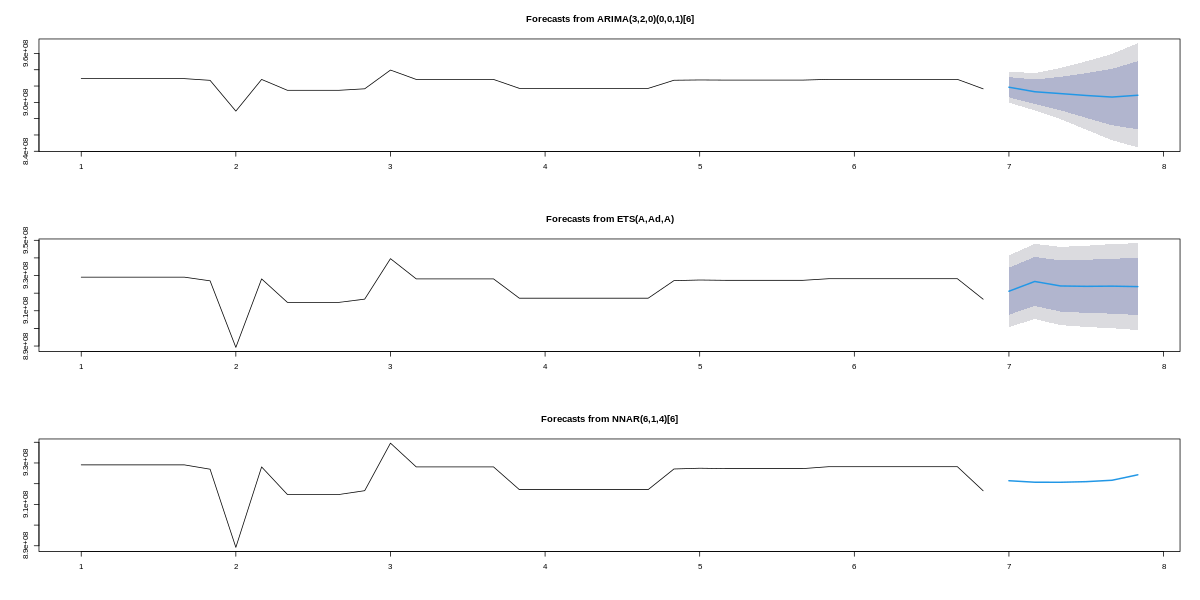

In [415]:
%%R -w 1200 -h 600

par(mfrow = c(3,1))
plot(prevArima6)
plot(prevHoltETS6)
plot(prevNeural6)

### Plots - Comparação de alguns ciclos

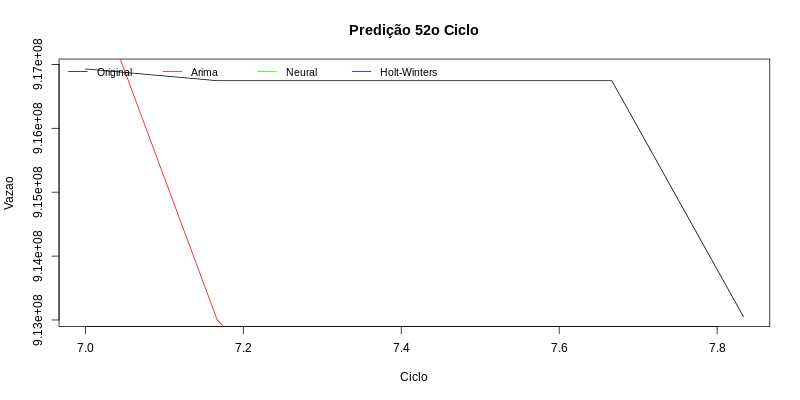

In [418]:
%%R -w 800 -h 400

plot(mytsTest7, main= "Predição 52o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima6$mean, col="red")
lines(prevNeural6$mean, col="green")
lines(prevHoltETS6$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

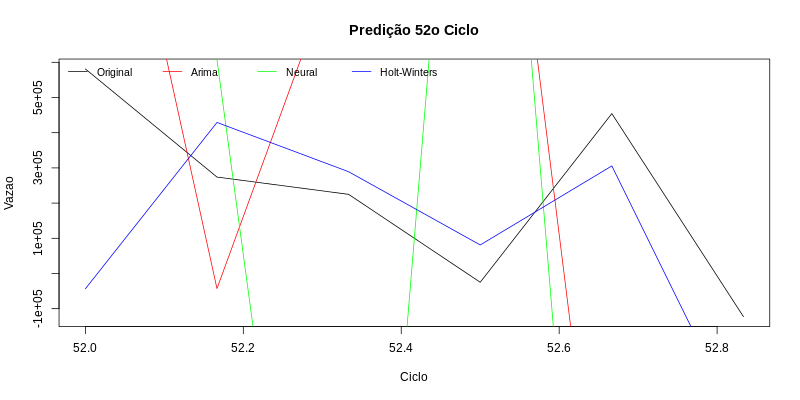

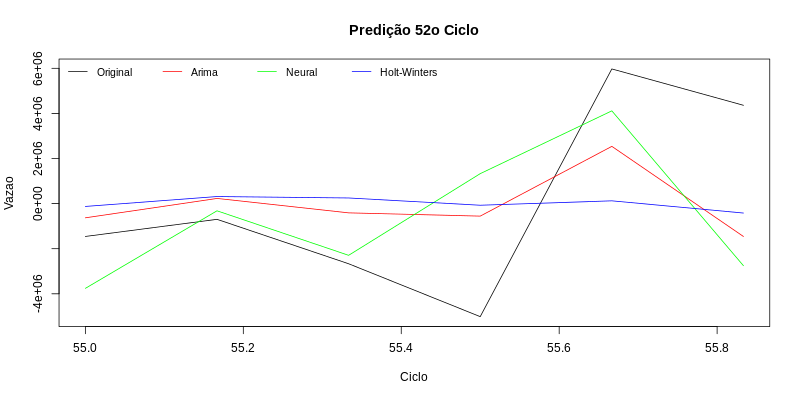

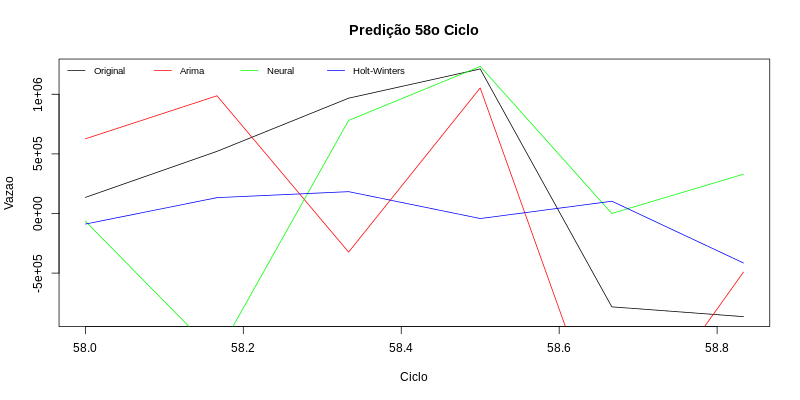

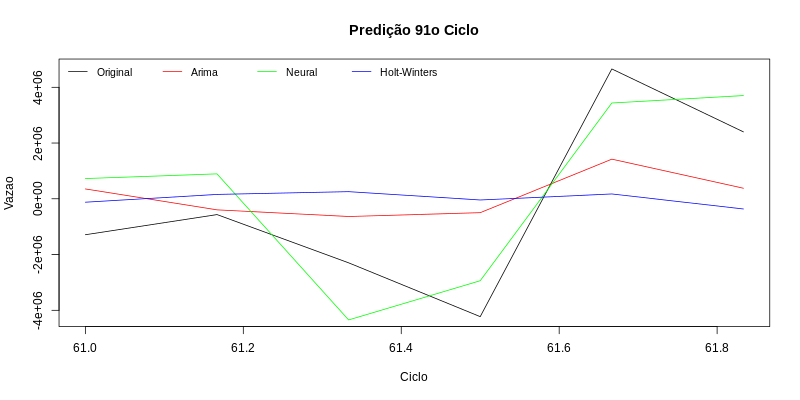

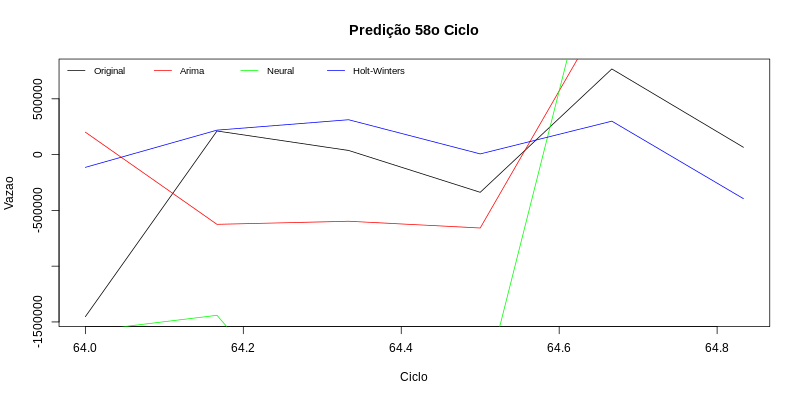

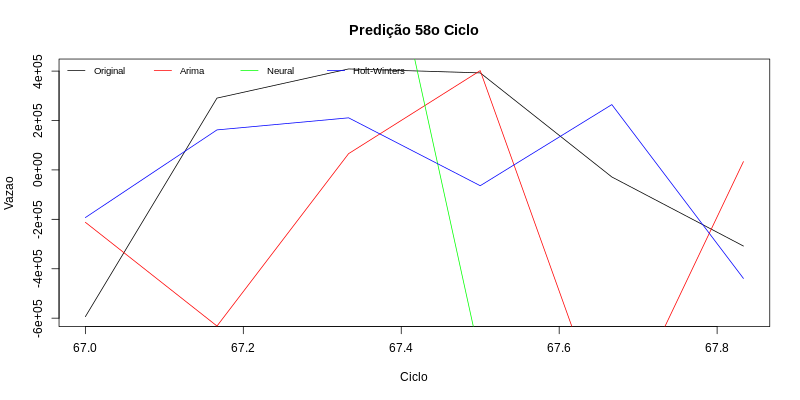

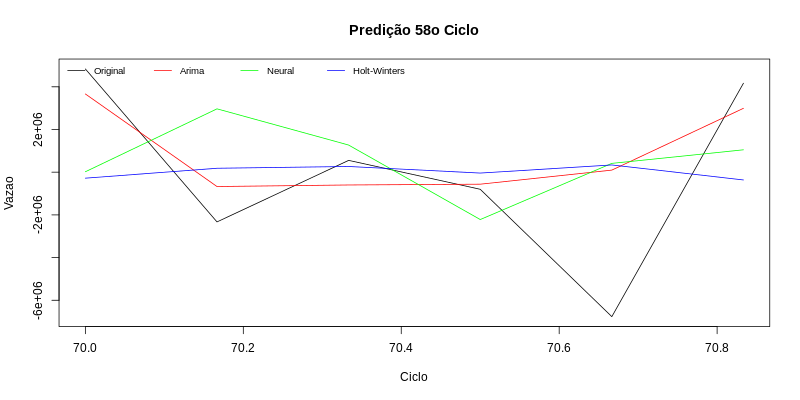

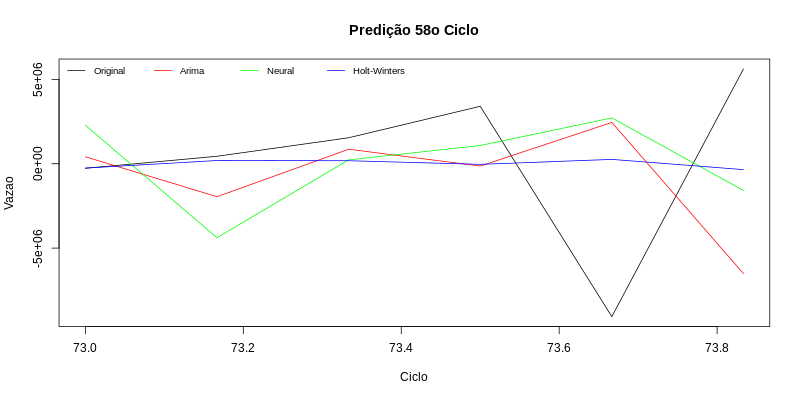

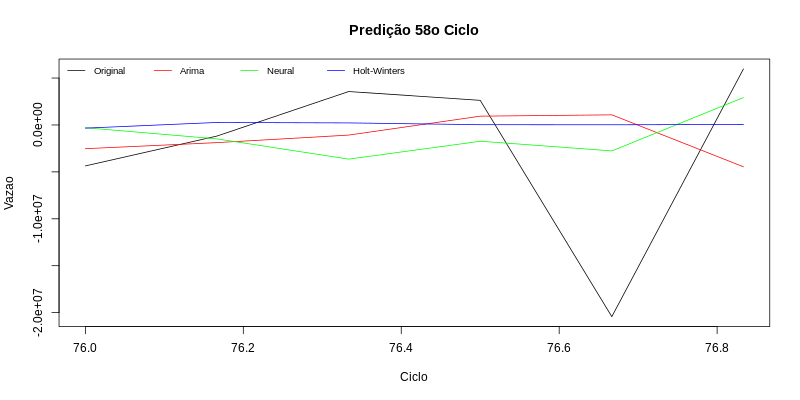

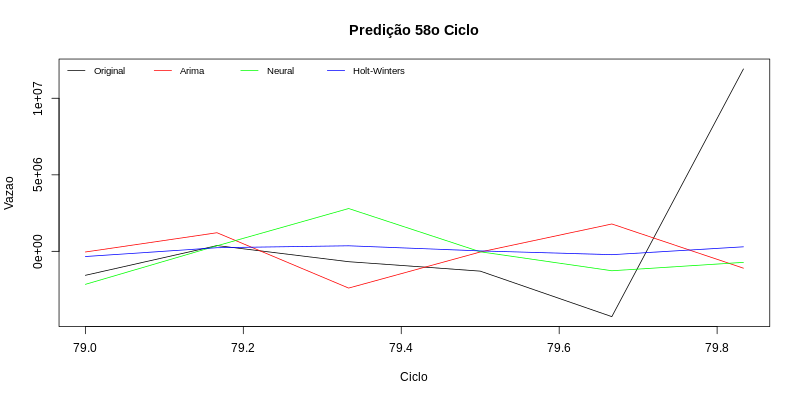

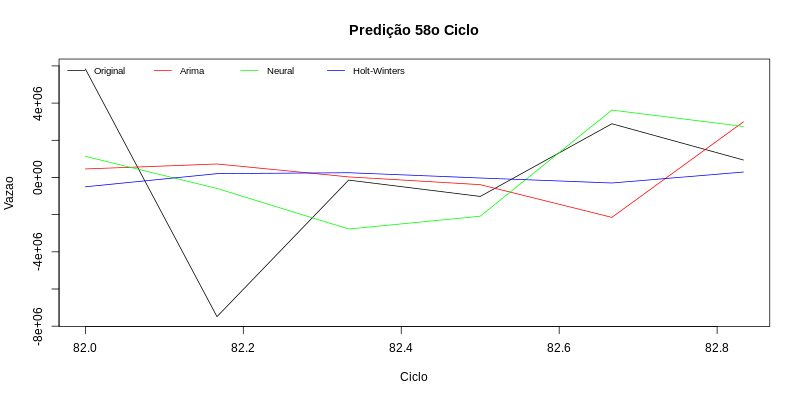

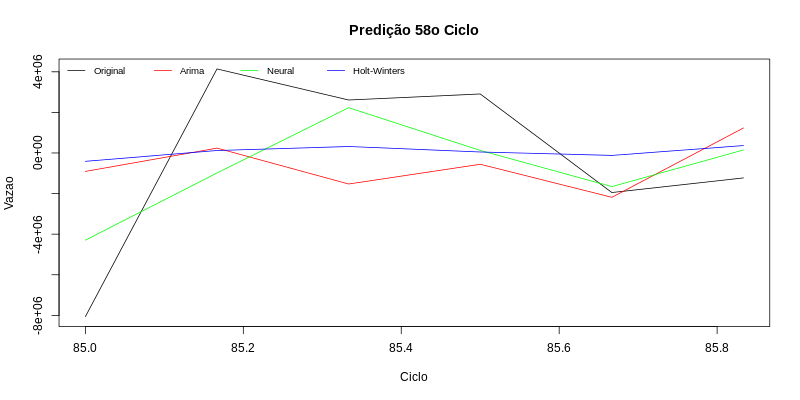

In [305]:
%%R -w 800 -h 400

plot(mytsTest52, main= "Predição 52o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima51$mean, col="red")
lines(prevNeural51$mean, col="green")
lines(prevHoltETS51$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)


plot(mytsTest55, main= "Predição 52o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima54$mean, col="red")
lines(prevNeural54$mean, col="green")
lines(prevHoltETS54$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

plot(mytsTest58, main= "Predição 58o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima57$mean, col="red")
lines(prevNeural57$mean, col="green")
lines(prevHoltETS57$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest61, main= "Predição 91o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima60$mean, col="red")
lines(prevNeural60$mean, col="green")
lines(prevHoltETS60$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

plot(mytsTest64, main= "Predição 58o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima63$mean, col="red")
lines(prevNeural63$mean, col="green")
lines(prevHoltETS63$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest67, main= "Predição 58o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima66$mean, col="red")
lines(prevNeural66$mean, col="green")
lines(prevHoltETS66$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest70, main= "Predição 58o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima69$mean, col="red")
lines(prevNeural69$mean, col="green")
lines(prevHoltETS69$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest73, main= "Predição 58o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima72$mean, col="red")
lines(prevNeural72$mean, col="green")
lines(prevHoltETS72$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest76, main= "Predição 58o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima75$mean, col="red")
lines(prevNeural75$mean, col="green")
lines(prevHoltETS75$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest79, main= "Predição 58o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima78$mean, col="red")
lines(prevNeural78$mean, col="green")
lines(prevHoltETS78$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest82, main= "Predição 58o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima81$mean, col="red")
lines(prevNeural81$mean, col="green")
lines(prevHoltETS81$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

plot(mytsTest85, main= "Predição 58o Ciclo", xlab="Ciclo", ylab="Vazao")
lines(prevArima84$mean, col="red")
lines(prevNeural84$mean, col="green")
lines(prevHoltETS84$mean, col="blue")
legend("topleft", legend = c("Original", "Arima", "Neural","Holt-Winters"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.8, bty = "n", horiz=T)

In [ ]:
%%R -h 250 -w 1500 # Autocorrelação dos conjuntos de treinamento (Indica dados estacionários)

par(mfrow = c(1, 4))
acf(mytsTrain8, main = "1")
acf(mytsTrain16, main = "2")
acf(mytsTrain24, main = "3")
acf(mytsTrain32, main = "4")
acf(mytsTrain40, main = "5")
acf(mytsTrain48, main = "6")
acf(mytsTrain56, main = "7")


## Avaliação

### RMSE

 [1]  6399841  7024490  5765819 16472660  5472001 23269798  6531106  9881246
 [9]  3896358  3391666


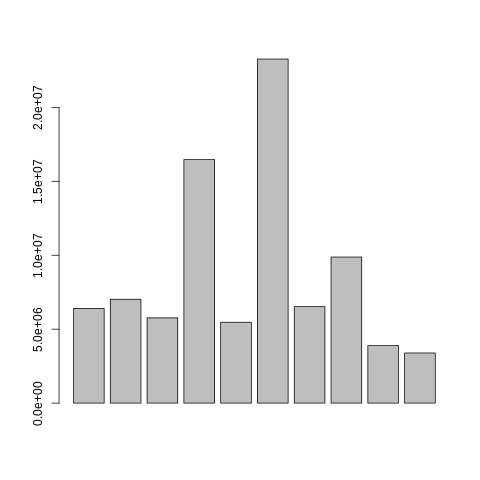

In [ ]:
%%R

Neural_RMSE_inOrder = c(
  rmse(mytsTest9, prevNeural8$mean),
  rmse(mytsTest17, prevNeural16$mean),
  rmse(mytsTest25, prevNeural24$mean),
  rmse(mytsTest33, prevNeural32$mean),
  rmse(mytsTest41, prevNeural40$mean),
  rmse(mytsTest49, prevNeural48$mean),
  rmse(mytsTest57, prevNeural56$mean),
  rmse(mytsTest65, prevNeural64$mean),
  rmse(mytsTest73, prevNeural72$mean),
  rmse(mytsTest81, prevNeural80$mean)
)
print(Neural_RMSE_inOrder)
barplot(Neural_RMSE_inOrder)

 [1]  4181922  4208767  4240600 22961964  5459360 24712492  4564876  7165645
 [9]  3361259  3253587


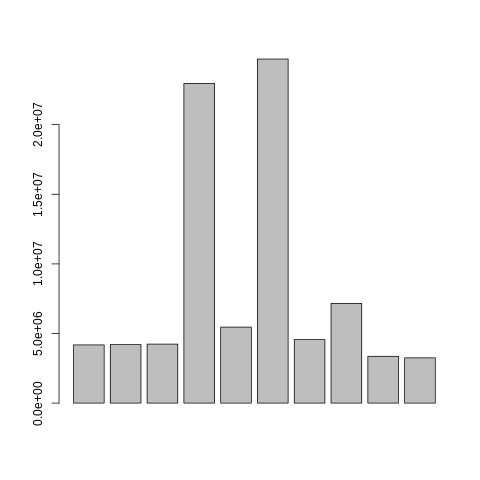

In [ ]:
%%R

Holt_RMSE_inOrder = c(
  rmse(mytsTest9, prevHolt8$mean),
  rmse(mytsTest17, prevHolt16$mean),
  rmse(mytsTest25, prevHolt24$mean),
  rmse(mytsTest33, prevHolt32$mean),
  rmse(mytsTest41, prevHolt40$mean),
  rmse(mytsTest49, prevHolt48$mean),
  rmse(mytsTest57, prevHolt56$mean),
  rmse(mytsTest65, prevHolt64$mean),
  rmse(mytsTest73, prevHolt72$mean),
  rmse(mytsTest81, prevHolt80$mean)
)
print(Holt_RMSE_inOrder)
barplot(Holt_RMSE_inOrder)

 [1]  3432837  4958756  4799537 20609523  5634978 25176662  3809726  6444677
 [9]  2842307  3238252


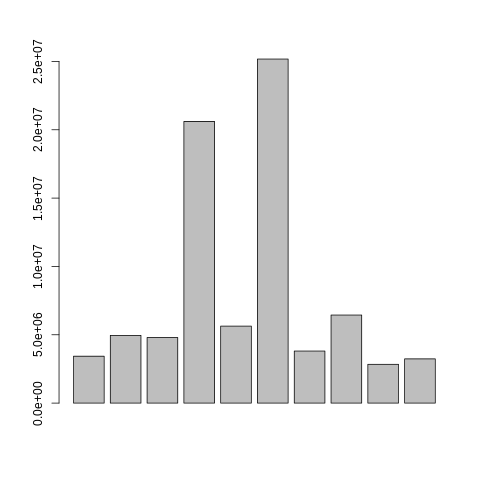

In [ ]:
%%R 

Arima_RMSE_inOrder = c(
  rmse(mytsTest9, prevArima8$mean),
  rmse(mytsTest17, prevArima16$mean),
  rmse(mytsTest25, prevArima24$mean),
  rmse(mytsTest33, prevArima32$mean),
  rmse(mytsTest41, prevArima40$mean),
  rmse(mytsTest49, prevArima48$mean),
  rmse(mytsTest57, prevArima56$mean),
  rmse(mytsTest65, prevArima64$mean),
  rmse(mytsTest73, prevArima72$mean),
  rmse(mytsTest81, prevArima80$mean)
)

print(Arima_RMSE_inOrder)
barplot(Arima_RMSE_inOrder)

### MAPE

 [1]  4.4910730  1.8525622  1.3868252  0.8114197  1.9099273  1.3333894
 [7]  2.2508356  1.8417302 55.2757689  2.4001348


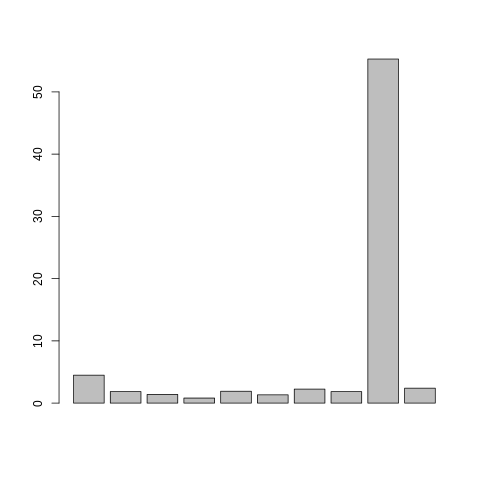

In [ ]:
%%R

Neural_mape_inOrder = c(
  mape(mytsTest9, prevNeural8$mean),
  mape(mytsTest17, prevNeural16$mean),
  mape(mytsTest25, prevNeural24$mean),
  mape(mytsTest33, prevNeural32$mean),
  mape(mytsTest41, prevNeural40$mean),
  mape(mytsTest49, prevNeural48$mean),
  mape(mytsTest57, prevNeural56$mean),
  mape(mytsTest65, prevNeural64$mean),
  mape(mytsTest73, prevNeural72$mean),
  mape(mytsTest81, prevNeural80$mean)
)
print(Neural_mape_inOrder)
barplot(Neural_mape_inOrder)

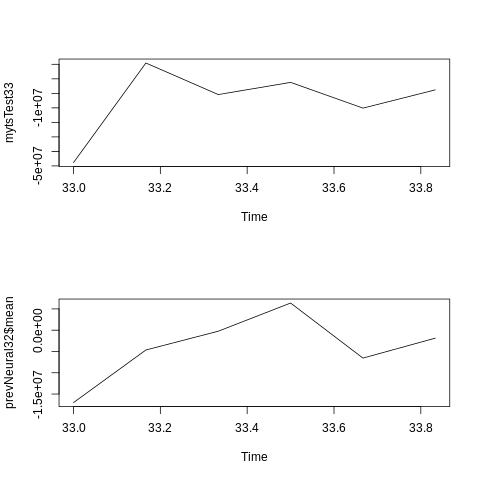

In [ ]:
%%R

par(mfrow=c(2,1))
plot(mytsTest33)
plot(prevNeural32$mean)

 [1]  1.0000000  1.0000000  0.9973857  1.0200275  3.6534387  0.9015788
 [7]  1.3023046  0.9833408 10.5452108  1.4041482


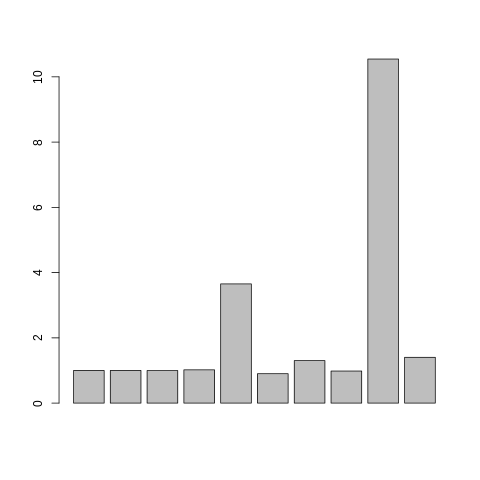

In [ ]:
%%R

Arima_mape_inOrder = c(
  mape(mytsTest9, prevArima8$mean),
  mape(mytsTest17, prevArima16$mean),
  mape(mytsTest25, prevArima24$mean),
  mape(mytsTest33, prevArima32$mean),
  mape(mytsTest41, prevArima40$mean),
  mape(mytsTest49, prevArima48$mean),
  mape(mytsTest57, prevArima56$mean),
  mape(mytsTest65, prevArima64$mean),
  mape(mytsTest73, prevArima72$mean),
  mape(mytsTest81, prevArima80$mean)
)

print(Arima_mape_inOrder)
barplot(Arima_mape_inOrder)

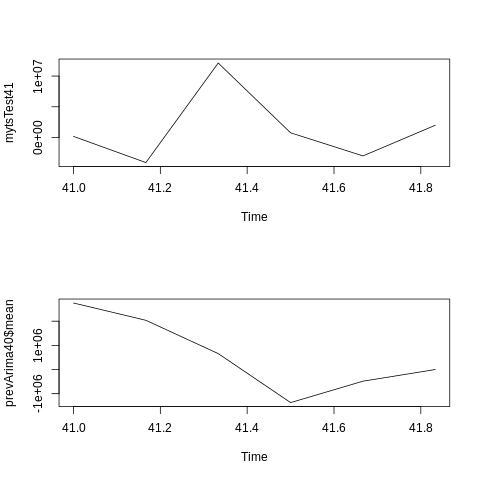

In [ ]:
%%R

par(mfrow=c(2,1))
plot(mytsTest41)
plot(prevArima40$mean)

 [1] 1.9847218 0.7648853 0.8162920 1.0980969 2.9067681 1.1500541 1.1344726
 [8] 1.1198688 4.2053714 1.1252140


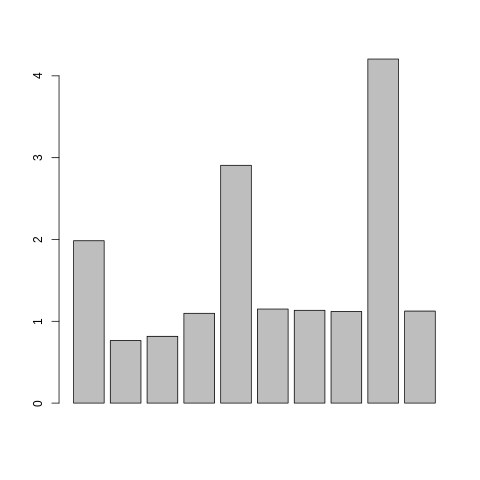

In [ ]:
%%R

Holt_mape_inOrder = c(
  mape(mytsTest9, prevHolt8$mean),
  mape(mytsTest17, prevHolt16$mean),
  mape(mytsTest25, prevHolt24$mean),
  mape(mytsTest33, prevHolt32$mean),
  mape(mytsTest41, prevHolt40$mean),
  mape(mytsTest49, prevHolt48$mean),
  mape(mytsTest57, prevHolt56$mean),
  mape(mytsTest65, prevHolt64$mean),
  mape(mytsTest73, prevHolt72$mean),
  mape(mytsTest81, prevHolt80$mean)
)

print(Holt_mape_inOrder)
barplot(Holt_mape_inOrder)